In [1]:
! pip uninstall -y -q tensorflow
! pip install -q tensorflow-gpu==2.8.0
! pip install -q deepmatch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 58.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16

# Partial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
from deepctr.models import *
import deepctr
import csv

In [5]:
user_recipe_df = pd.read_csv('user_recipe.csv',  encoding='utf-8')
user_recipe_df.head(2), user_recipe_df

(   user_id  recipe_id  rating           dateLastModified
 0       39      61727       4  2001-03-26T07:36:16.653\n
 1       39       7612       5  2004-08-02T16:48:37.107\n,
          user_id  recipe_id  rating           dateLastModified
 0             39      61727       4  2001-03-26T07:36:16.653\n
 1             39       7612       5  2004-08-02T16:48:37.107\n
 2             39      12009       4   2001-02-28T10:37:25.59\n
 3             39      88185       5  2009-05-18T14:55:11.517\n
 4             39      24445       5   2015-05-07T15:42:20.32\n
 ...          ...        ...     ...                        ...
 151143  21907115      12942       5   2010-02-26T07:06:39.46\n
 151144  21907115      16348       4   2009-07-17T14:15:47.27\n
 151145  21907115      24332       5  2008-02-20T13:08:55.997\n
 151146  21907115       7322       4   2012-11-19T07:22:35.54\n
 151147  21907115      18327       4   2016-04-12T04:10:38.48\n
 
 [151148 rows x 4 columns])

In [7]:
recipe_df = pd.read_csv('recipe_without_reviews.csv')
recipe_df.head(2)

,Unnamed: 0,recipe_id,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,tags
0,0,6698,Mom's Zucchini Bread,9355,appetizer,4.754207,https://images.media-allrecipes.com/userphotos...,all-purpose flour^salt^baking soda^baking powd...,{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",north-american;breads;easy;beginner-cook;inexp...
1,1,6709,Zucchini Walnut Bread,58,appetizer,4.478873,http://images.media-allrecipes.com/userphotos/...,chopped walnuts^eggs^white sugar^vegetable oil...,"{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...",weeknight;breads;fruit;vegetables;kid-friendly...


In [8]:
user_meal_df = pd.read_csv('user_meal.csv')
user_meal_df.head(2)

,meal_id,user_id
0,26,39
1,37,39


In [9]:
meal_df = pd.read_csv('meal.csv')
meal_df.head(2)

,bundle_id,appetizer,main_dish,dessert
0,242,8626,8652,17652
1,885,15034,25272,24843


In [10]:
# merging user_recipe and recipe df
user_recipe_merged_df = user_recipe_df.merge(recipe_df, on='recipe_id')
user_recipe_merged_df.head(4)

,user_id,recipe_id,rating,dateLastModified,Unnamed: 0,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,tags
0,39,61727,4,2001-03-26T07:36:16.653\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...
1,8799,61727,5,2004-09-21T06:23:16.427\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...
2,35974,61727,5,2003-04-19T07:31:14.357\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...
3,89295,61727,5,2011-09-01T17:50:36.427\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...


In [11]:
all_columns = user_recipe_merged_df.columns
all_columns

Index(['user_id', 'recipe_id', 'rating', 'dateLastModified', 'Unnamed: 0',
       'recipe_name', 'review_nums', 'category', 'aver_rate', 'image_url',
       'ingredients', 'cooking_directions', 'nutritions', 'tags'],
      dtype='object')

In [12]:
user_recipe_merged_df.user_id.unique(), user_recipe_merged_df.user_id.nunique()

(array([     39,    8799,   35974, ..., 2549544,  798244, 2695053]), 1575)

In [13]:
user_recipe_merged_df.recipe_name.unique(), user_recipe_merged_df.recipe_name.nunique()

(array(['Ten Minute Enchilada Sauce', "Chocolate Lovers' Favorite Cake",
        'Cajun Chicken Pasta', ..., 'Fiesta Lime Chicken',
        'Spinach and Artichoke Greek Yogurt Dip',
        'Chewy Chocolate Peanut Bars'], dtype=object),
 7280)

In [14]:
user_recipe_merged_df.rating.value_counts()

rating
5    101162
4     49986
Name: count, dtype: int64

In [15]:
# unique category of recipes
unique_categories = user_recipe_merged_df.category.unique()
unique_categories, user_recipe_merged_df.category.nunique()

(array(['main-dish', 'dessert', 'appetizer'], dtype=object), 3)

## Visualizing the info

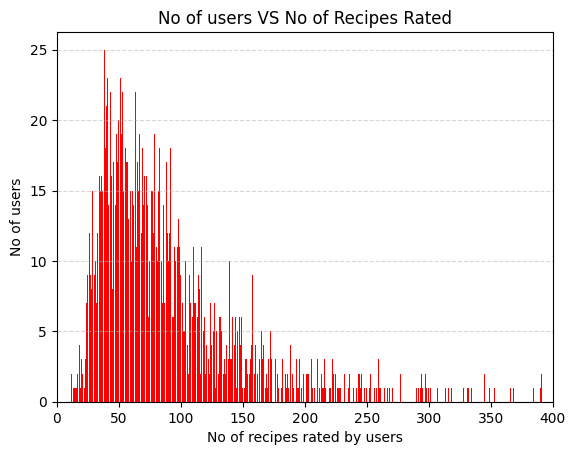

In [16]:
users_recipe_counts = user_recipe_merged_df['user_id'].value_counts().sort_index()
users_per_recipe_count = users_recipe_counts.value_counts().sort_index()

plt.bar(users_per_recipe_count.index, users_per_recipe_count.values, color='red')
plt.xlabel('No of recipes rated by users')
plt.ylabel('No of users')
plt.xlim(0,400)
plt.title('No of users VS No of Recipes Rated')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

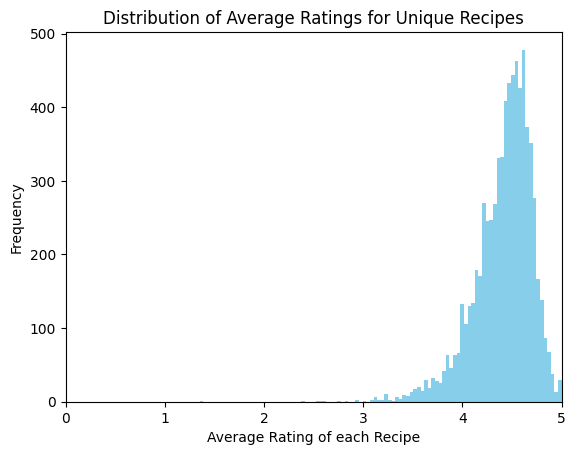

In [17]:
avg_ratings = user_recipe_merged_df.groupby('recipe_id')['aver_rate'].mean()

plt.hist(avg_ratings, bins=100, color='skyblue')
plt.xlabel('Average Rating of each Recipe')
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.title('Distribution of Average Ratings for Unique Recipes')
plt.show()

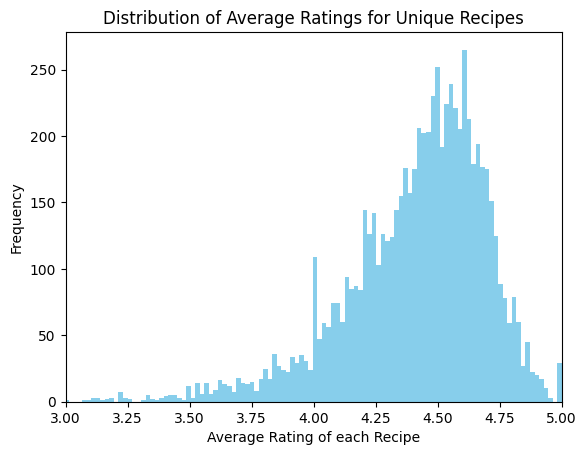

In [18]:
plt.hist(avg_ratings, bins=200, color='skyblue')
plt.xlabel('Average Rating of each Recipe')
plt.ylabel('Frequency')
plt.xlim(3,5)
plt.title('Distribution of Average Ratings for Unique Recipes')
plt.show()

In [116]:
# taking only 100000 for the ingredients mixed model

df = user_recipe_merged_df[:100000]
df['dateLastModified']

0        2001-03-26T07:36:16.653\n
1        2004-09-21T06:23:16.427\n
2        2003-04-19T07:31:14.357\n
3        2011-09-01T17:50:36.427\n
4        2008-02-07T17:04:54.523\n
                   ...            
99995    2009-03-31T18:48:32.423\n
99996     2010-10-23T08:14:33.82\n
99997    2008-03-19T16:52:30.527\n
99998     2008-12-09T06:42:09.97\n
99999    2009-03-24T17:25:14.397\n
Name: dateLastModified, Length: 100000, dtype: object

In [117]:
# preprocessing the date modified to get the hour of recommendation
# the hour at which review was given can be an insight maybe?
df["datetime"] = pd.to_datetime(df['dateLastModified'], format="mixed")
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df.hour.unique()

<ipython-input-117-17b7f3e89109>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df['dateLastModified'], format="mixed")
<ipython-input-117-17b7f3e89109>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["datetime"].dt.year
<ipython-input-117-17b7f3e89109>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

array([ 7,  6, 17, 19, 15, 16,  8, 23,  4, 10, 18, 13, 11, 12,  2, 20, 22,
        5, 21, 14,  9,  0,  3,  1], dtype=int32)

In [118]:
from sklearn.model_selection import train_test_split


## Model with Using only Hour of the Day

In [119]:
# df[['user_id', 'hour']]
df['aver_rate'].unique(), df['aver_rate'].nunique()

(array([4.43977356, 4.68384552, 4.67671633, ..., 4.05000019, 3.91382408,
        4.68283606]),
 1493)

In [ ]:
df_user_hour = df

# since the rating is only 4 or 5, it can be treated as categorical value
sparse_features_user_hour = ['user_id', 'hour']
target = ['rating']

df_user_hour[sparse_features_user_hour] = df_user_hour[sparse_features_user_hour].fillna(0)

label_encoders_user_hour = {}
for feature in sparse_features_user_hour:
  lbe = sklearn.preprocessing.LabelEncoder()
  df_user_hour[feature] = lbe.fit_transform(df_user_hour[feature])
  label_encoders_user_hour[feature] = lbe

train, test = train_test_split(df_user_hour, test_size=0.25)

feature_columns_user_hour = [deepctr.feature_column.SparseFeat(feature, vocabulary_size = df_user_hour[feature].max() + 1, embedding_dim=6) for feature in sparse_features_user_hour]

dnn_feature_columns_user_hour = feature_columns_user_hour
linear_feature_columns_user_hour = feature_columns_user_hour
feature_names_user_hour = deepctr.feature_column.get_feature_names(linear_feature_columns_user_hour+dnn_feature_columns_user_hour)

epochs = 20

# getting the train and test data for the model input ready
train_model_input_user_hour = {name: train[name] for name in feature_names_user_hour}
test_model_input_user_hour = {name: test[name] for name in feature_names_user_hour}

model_user_hour = deepctr.models.DeepFM(linear_feature_columns_user_hour, dnn_feature_columns_user_hour, task='regression')

model_user_hour.compile('adam', 'mse', metrics=['mse', 'accuracy'])

history_user_hour = model_user_hour.fit(train_model_input_user_hour, train[target].values, batch_size=256, epochs = epochs, verbose = 1, validation_split = 0.2)

mse_user_hour = model_user_hour.evaluate(test_model_input_user_hour, test[target].values, batch_size=256)[1]
print(f'MSE IS :{mse_user_hour}')

loss = history_user_hour.history['loss']
val_loss = history_user_hour.history['val_loss']

epoch_arr = list(range(1, epochs+1))

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.title('Training and Validation Loss with DeepFM')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
df_user_hour = df

# since the rating is only 4 or 5, it can be treated as categorical value
sparse_features_user_hour = ['user_id', 'hour']
target = ['rating']

df_user_hour[sparse_features_user_hour] = df_user_hour[sparse_features_user_hour].fillna(0)

label_encoders_user_hour = {}
for feature in sparse_features_user_hour:
  lbe = sklearn.preprocessing.LabelEncoder()
  df_user_hour[feature] = lbe.fit_transform(df_user_hour[feature])
  label_encoders_user_hour[feature] = lbe

train, test = train_test_split(df_user_hour, test_size=0.25)

feature_columns_user_hour = [deepctr.feature_column.SparseFeat(feature, vocabulary_size = df_user_hour[feature].max() + 1, embedding_dim=6) for feature in sparse_features_user_hour]

dnn_feature_columns_user_hour = feature_columns_user_hour
linear_feature_columns_user_hour = feature_columns_user_hour
feature_names_user_hour = deepctr.feature_column.get_feature_names(linear_feature_columns_user_hour+dnn_feature_columns_user_hour)

epochs = 20

# getting the train and test data for the model input ready
train_model_input_user_hour = {name: train[name] for name in feature_names_user_hour}
test_model_input_user_hour = {name: test[name] for name in feature_names_user_hour}

model_user_hour = deepctr.models.DeepFM(linear_feature_columns_user_hour, dnn_feature_columns_user_hour, task='regression')

model_user_hour.compile('adam', 'mse', metrics=['mse', 'accuracy'])

history_user_hour = model_user_hour.fit(train_model_input_user_hour, train[target].values, batch_size=256, epochs = epochs, verbose = 1, validation_split = 0.2)

mse_user_hour = model_user_hour.evaluate(test_model_input_user_hour, test[target].values, batch_size=256)[1]
print(f'MSE IS :{mse_user_hour}')

loss = history_user_hour.history['loss']
val_loss = history_user_hour.history['val_loss']

epoch_arr = list(range(1, epochs+1))

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.title('Training and Validation Loss with DeepFM')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0,0.1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Adding more features for the model

In [120]:
df['ingredients'] = df['ingredients'].str.replace('^', '|')
df['ingredients'] = df['ingredients'].str.replace(' ', '')
df['ingredients']

<ipython-input-120-bf669cb06865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ingredients'] = df['ingredients'].str.replace('^', '|')
<ipython-input-120-bf669cb06865>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ingredients'] = df['ingredients'].str.replace(' ', '')


0        vegetableoil|self-risingflour|NewMexico|tomato...
1        vegetableoil|self-risingflour|NewMexico|tomato...
2        vegetableoil|self-risingflour|NewMexico|tomato...
3        vegetableoil|self-risingflour|NewMexico|tomato...
4        vegetableoil|self-risingflour|NewMexico|tomato...
                               ...                        
99995    to3pound)wholechicken|celerywithleaves|babycar...
99996    to3pound)wholechicken|celerywithleaves|babycar...
99997    to3pound)wholechicken|celerywithleaves|babycar...
99998    to3pound)wholechicken|celerywithleaves|babycar...
99999    to3pound)wholechicken|celerywithleaves|babycar...
Name: ingredients, Length: 100000, dtype: object

In [121]:
def split(x):
    key_ans = x.split('|')
    for key in key_ans:
        if key not in key2index:
            # Notice : input value 0 is a special "padding",so we do not use 0 to encode valid feature for sequence input
            key2index[key] = len(key2index) + 1
    return list(map(lambda x: key2index[x], key_ans))

In [122]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [123]:
df_mixed = df

# since the rating is only 4 or 5, it can be treated as categorical value
sparse_features_mixed = ['user_id', 'hour', 'category']
variable_length_features = ['ingredients']
target = ['rating']

df_mixed[sparse_features_mixed] = df_mixed[sparse_features_mixed].fillna(0)

label_encoders_mixed = {}
for feature in sparse_features_mixed:
  lbe = sklearn.preprocessing.LabelEncoder()
  df_mixed[feature] = lbe.fit_transform(df_mixed[feature])
  label_encoders_mixed[feature] = lbe

train, test = train_test_split(df_mixed, test_size=0.2)

# -------------------DIFFERENT FEATURES---------------------------------------------------------


key2index = {}
ingredients_list = list(map(split, df_mixed['ingredients'].values))
ingredients_length = np.array(list(map(len, ingredients_list)))
print(f'Length of ingredients list before padding -> {len(ingredients_list[0])}')
max_len = max(ingredients_length)
print(f'Max length of ingredients is: {max_len}')

# padding sequences for uniformity of ingredients list
ingredients_list = pad_sequences(ingredients_list, maxlen = max_len, padding='post')
print(len(ingredients_list[[0]]))

feature_columns_mixed = [deepctr.feature_column.SparseFeat(feature, vocabulary_size = df_mixed[feature].max() + 1, embedding_dim=4) for feature in sparse_features_mixed]

varlen_feature_columns = [deepctr.feature_column.VarLenSparseFeat(deepctr.feature_column.SparseFeat('ingredients', vocabulary_size=len(key2index) + 1, embedding_dim=4), maxlen=max_len, combiner='mean', weight_name=None)]

dnn_feature_columns_mixed = feature_columns_mixed + varlen_feature_columns
linear_feature_columns_mixed = feature_columns_mixed + varlen_feature_columns
feature_names_mixed = deepctr.feature_column.get_feature_names(linear_feature_columns_mixed+dnn_feature_columns_mixed)


<ipython-input-123-e12f087380e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mixed[sparse_features_mixed] = df_mixed[sparse_features_mixed].fillna(0)
<ipython-input-123-e12f087380e6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mixed[feature] = lbe.fit_transform(df_mixed[feature])
<ipython-input-123-e12f087380e6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Length of ingredients list before padding -> 9
Max length of ingredients is: 28
1


In [124]:
feature_names_mixed, varlen_feature_columns

(['user_id', 'hour', 'category', 'ingredients'],
 [VarLenSparseFeat(sparsefeat=SparseFeat(name='ingredients', vocabulary_size=2772, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x7bb04c6d7f40>, embedding_name='ingredients', group_name='default_group', trainable=True), maxlen=28, combiner='mean', length_name=None, weight_name=None, weight_norm=True)])

In [125]:
# ------------------FOR MODEL ------------------------------------------------------------------

epochs = 20

# getting the train and test data for the model input ready
train_model_input_mixed = {name: train[name] for name in feature_names_mixed}
train_model_input_mixed["ingredients"] = ingredients_list
train_model_input_mixed["ingredients_weight"] = np.random.randn(df_mixed.shape[0], max_len, 1)

test_model_input_mixed = {name: test[name] for name in feature_names_mixed}


# -------------------------MODEL ---------------------------------------------------------------

model_mixed = deepctr.models.DeepFM(linear_feature_columns_mixed, dnn_feature_columns_mixed, task='regression')

model_mixed.compile('adam', 'mse', metrics=['mse'])
model_mixed

In [126]:
len(train_model_input_mixed['ingredients'])

100000

In [127]:
train.shape, test.shape

((80000, 19), (20000, 19))

In [128]:
print('model training started')
history_mixed = model_mixed.fit(train_model_input_mixed, train[target].values, batch_size=32, epochs = epochs, verbose = 1, validation_split = 0.2)
# ----------------------------------------------------------------------------------

model training started
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/functional.py:587: UserWarning: Input dict contained keys ['ingredients_weight'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


1999/2000 [============================>.] - ETA: 0s - loss: 0.4630 - mse: 0.4630

/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/functional.py:587: UserWarning: Input dict contained keys ['ingredients_weight'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


2000/2000 [==============================] - 10s 4ms/step - loss: 0.4629 - mse: 0.4629 - val_loss: 0.2037 - val_mse: 0.2035
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1979 - mse: 0.1977 - val_loss: 0.1980 - val_mse: 0.1977
Epoch 3/20
2000/2000 [==============================] - 9s 4ms/step - loss: 0.1980 - mse: 0.1976 - val_loss: 0.2025 - val_mse: 0.2020
Epoch 4/20
2000/2000 [==============================] - 9s 5ms/step - loss: 0.1954 - mse: 0.1948 - val_loss: 0.1966 - val_mse: 0.1960
Epoch 5/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1956 - mse: 0.1949 - val_loss: 0.1995 - val_mse: 0.1987
Epoch 6/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1929 - mse: 0.1919 - val_loss: 0.2006 - val_mse: 0.1996
Epoch 7/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.1926 - mse: 0.1916 - val_loss: 0.1982 - val_mse: 0.1970
Epoch 8/20
2000/2000 [==============================] - 9s 4ms/step - lo

In [129]:
loss = history_mixed.history['loss']
val_loss = history_mixed.history['val_loss']

<ipython-input-132-c0896c8d417a>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
<ipython-input-132-c0896c8d417a>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')


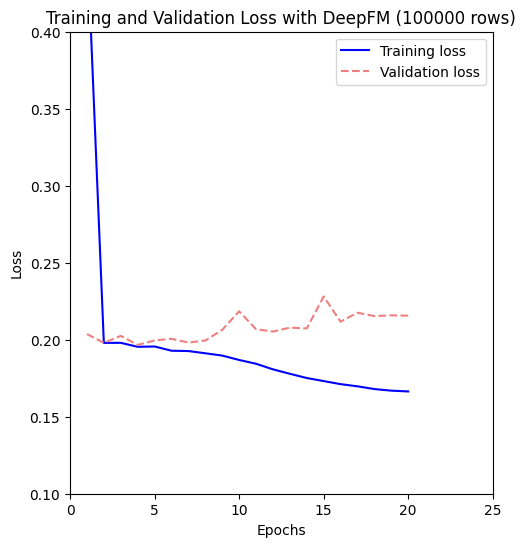

In [132]:
epoch_arr = list(range(1, epochs+1))

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.title('Training and Validation Loss with DeepFM (100000 rows)')
ax = plt.gca()
ax.set_xlim([0,25])
ax.set_ylim([0.1, 0.4])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# ingredients are: vegetable oil^self-rising flour^New Mexico

In [133]:
df.user_id

0           0
1           6
2          20
3          32
4          37
         ... 
99995    1070
99996    1107
99997    1125
99998    1155
99999    1184
Name: user_id, Length: 100000, dtype: int64

In [136]:
user_input = {
  'user_id':[ 32,1070],
  'hour':[ 20,8],
  'category':['dessert', 'dessert'],
  'ingredients':[ 'vegetableoil|self-risingflour|to3pound)wholechicken|celerywithleaves', 'vegetableoil|self-risingflour|celerywithleaves'],
}
test_df = pd.DataFrame(user_input)
test_df.head()

,user_id,hour,category,ingredients
0,32,20,dessert,vegetableoil|self-risingflour|to3pound)wholech...
1,1070,8,dessert,vegetableoil|self-risingflour|celerywithleaves


### Inference with VarLenSparseFeat remains!

## Plotted with only 50000 rows of the dataframe

<ipython-input-115-49087af7442e>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
<ipython-input-115-49087af7442e>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')


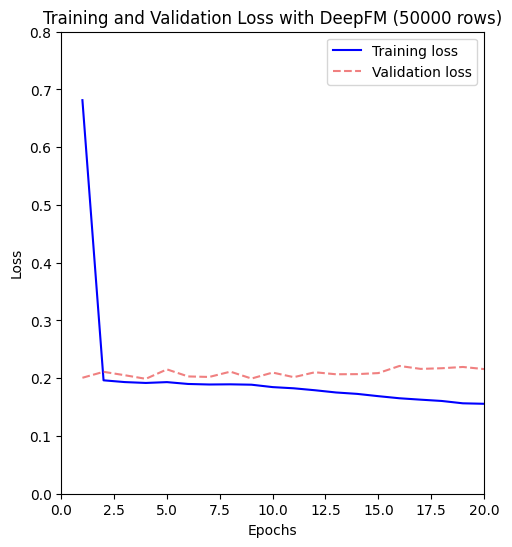

In [115]:
epoch_arr = list(range(1, epochs+1))

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.title('Training and Validation Loss with DeepFM (50000 rows)')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0,0.8])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
# sparse_features_mixed = ['user_id', 'hour', 'category']
# variable_length_features = ['ingredients']
# target = ['rating']

17436    5
27092    4
28161    4
5266     4
115      5
        ..
20949    5
1332     5
20602    5
8289     4
20558    5
Name: rating, Length: 7500, dtype: int64